In [1]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 공부 시간 x와 성적 y의 리스트를 만들기
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

print(x)
print(y)

[2, 4, 6, 8]
[81, 93, 91, 97]


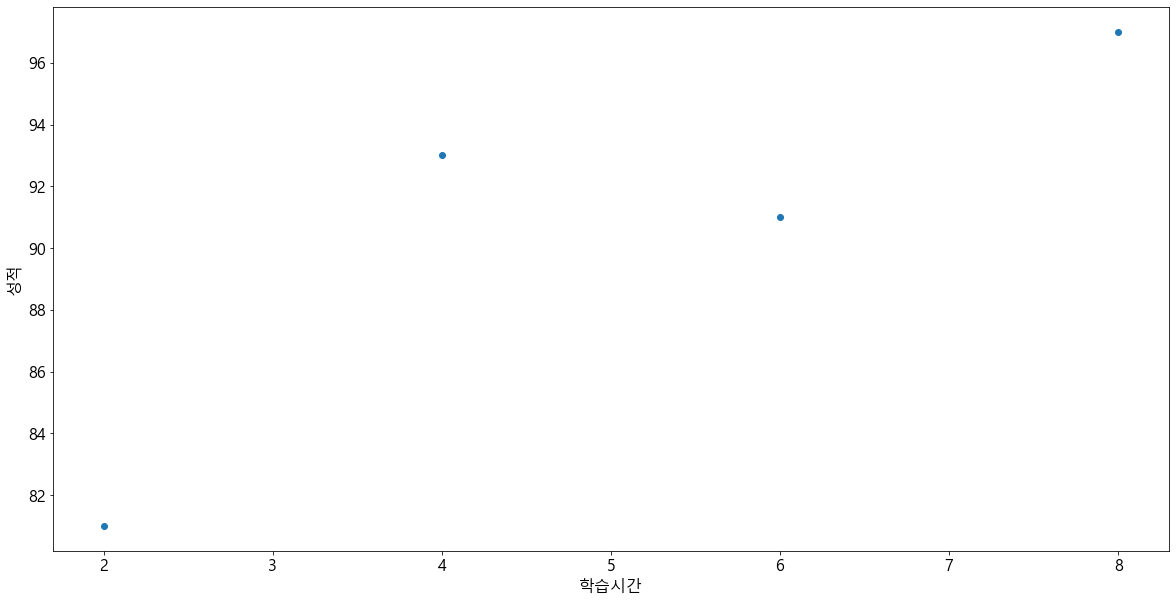

In [3]:
# 그래프로 그리기
plt.scatter(x, y)
plt.ylabel('성적')
plt.xlabel('학습시간')
plt.show()

In [4]:
# 데이터를 ndarray로 생성한다.
x_data = np.array(x)
y_data = np.array(y)

print(x_data)
print(y_data)

[2 4 6 8]
[81 93 91 97]


In [5]:
# 임의의 기울기와 절편
a = 0
b = 0

In [6]:
# 학습률 정하기
# lr = 0.05
lr = 0.03

In [7]:
# 몇 번 반복할지..
epochs = 2001

In [8]:
# 경사 하강법
# 에포크 수 만큼 반복
for i in range(epochs) :
    # 현재의 기울기와 절편을 이용해 값을 예측한다.
    y_pred = a * x_data + b
    # print(y_pred)
    
    # 오차를 구한다.
    error = y_data - y_pred
    # print(error)
    
    # 오차 함수를 a로 미분한 값 - 이건 공식임
    a_diff = -(2 / len(x_data)) * sum(x_data * error)
    # 오차 함수를 b로 미분한 값
    b_diff = -(2 / len(x_data)) * sum(error)
    
    # print(a_diff)
    # print(b_diff)
    
    # 학습률을 곱해 기존의 a 값을 업데이트 한다.
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    # print(a)
    # print(b)
    
    # 100 회 마다 기울기와 절편을 출력한다
    if i % 100 == 0:
        print(f'epoch : {i}, 기울기 : {a}, 절편 : {b}')

epoch : 0, 기울기 : 27.84, 절편 : 5.43
epoch : 100, 기울기 : 7.073858435872394, 절편 : 50.51166161138297
epoch : 200, 기울기 : 4.095999380762421, 절편 : 68.28224379060177
epoch : 300, 기울기 : 2.9756829100119027, 절편 : 74.96781336233505
epoch : 400, 기울기 : 2.5542024233262106, 절편 : 77.48302865233052
epoch : 500, 기울기 : 2.3956349066513707, 절편 : 78.42929177728175
epoch : 600, 기울기 : 2.3359793398132864, 절편 : 78.78529068727728
epoch : 700, 기울기 : 2.313535987420573, 절편 : 78.91922301600925
epoch : 800, 기울기 : 2.3050924490666174, 절편 : 78.96961044185792
epoch : 900, 기울기 : 2.3019158585694823, 절편 : 78.98856697541248
epoch : 1000, 기울기 : 2.3007207758016315, 절편 : 78.99569871827002
epoch : 1100, 기울기 : 2.300271167070735, 절편 : 78.99838179089187
epoch : 1200, 기울기 : 2.3001020172709508, 절편 : 78.9993912045567
epoch : 1300, 기울기 : 2.300038380484562, 절편 : 78.99977096168232
epoch : 1400, 기울기 : 2.3000144393354365, 절편 : 78.9999138322214
epoch : 1500, 기울기 : 2.3000054323026444, 절편 : 78.99996758234106
epoch : 1600, 기울기 : 2.300002043716771

In [9]:
# 발견한 기울기와 절편을 통해 예측 결과를 추출한다.
y_pred = a * x_data + b
y_pred

array([83.59999984, 88.19999992, 92.8       , 97.40000008])

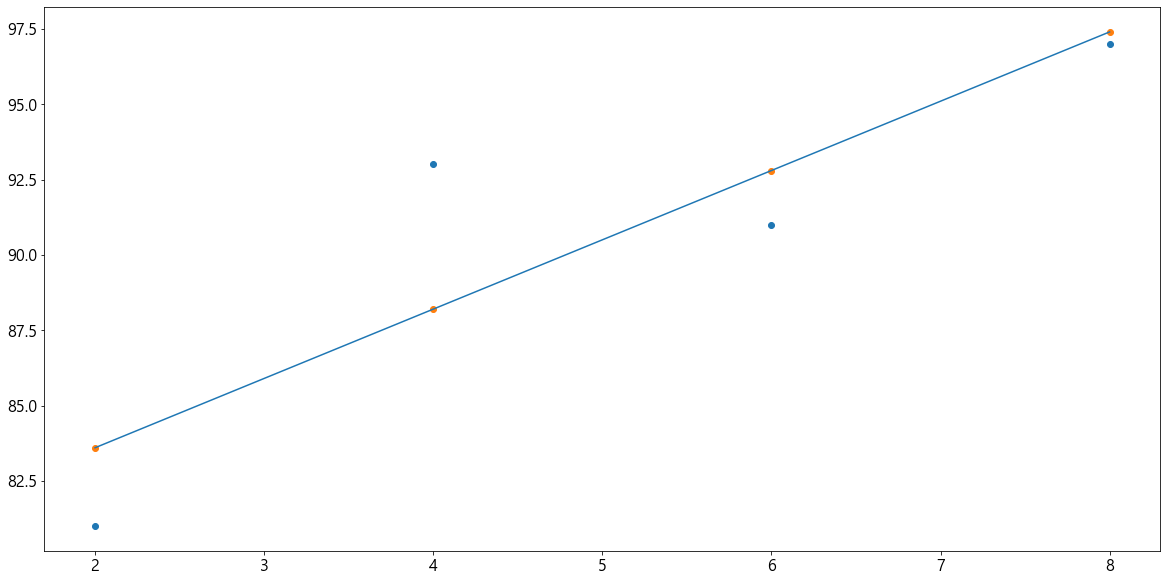

In [12]:
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()